# Model Evaluation

This notebook is to evaluate the model trained for VQA.

In [2]:
%matplotlib inline
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Get Dataloader

In [3]:
from data_loader import get_loader

# dataloader params
input_dir = '../../data/vqa/inputs64'
#input_dir = '../../data/vqa/inputs224'
max_qst_length = 30
max_num_ans = 10
batch_size = 4
num_workers = 0
train_portion = 0.01

data_loader = get_loader(
    input_dir=input_dir,
    input_vqa_train='train.npy',
    input_vqa_valid='valid.npy',
    max_qst_length=max_qst_length,
    max_num_ans=max_num_ans,
    batch_size=batch_size,
    num_workers=num_workers,
    train_portion=train_portion)

train_loader = data_loader['train']
train_dataset = train_loader.dataset.dataset
print(f'data_loader train len: {len(train_loader)}')
print(f'qst_vocab_size: {train_dataset.qst_vocab.vocab_size}')


data_loader train len: 1110
qst_vocab_size: 17858


### Get Model

In [5]:
import config
from models_lct import VqaModel as LctVqaModel

config.ARCH_TYPE = 'darts'

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
# model params
embed_size = 512
qst_vocab_size = train_dataset.qst_vocab.vocab_size
ans_vocab_size = 1000
word_embed_size = 300
num_layers = 1
hidden_size = 512

def get_model(exp_path):
    model = LctVqaModel(
        embed_size=embed_size,
        qst_vocab_size=qst_vocab_size,
        ans_vocab_size=ans_vocab_size,
        word_embed_size=word_embed_size,
        num_layers=num_layers,
        hidden_size=hidden_size
    )
    model.to( DEVICE )
    model_name = 'ef_model.pt'
    model_path = os.path.join(exp_path, model_name)
    state_dict = torch.load(model_path, map_location=DEVICE)
    model.load_state_dict( state_dict['ef_model'] )
    
    # freeze params
    for param in model.parameters():
        param.requires_grad = False
    model.eval()
    return model

exp_dir = './experiment_data'
# exp_name = 'qst_eval'
exp_name = 'exp2080Ti-1'
exp_path = os.path.join(exp_dir, exp_name)
model = get_model(exp_path)
print('model type:', type(model))

model type: <class 'models_lct.VqaModel'>


### Evaluate Model - Plots

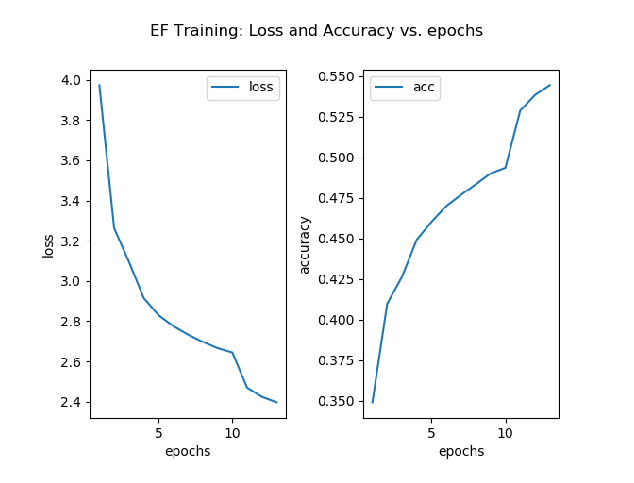

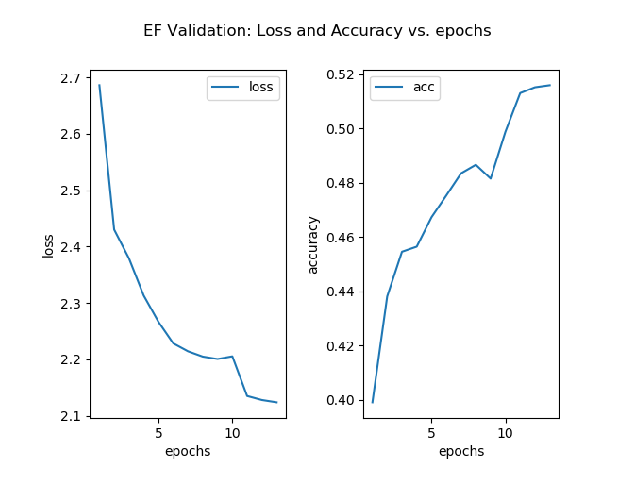

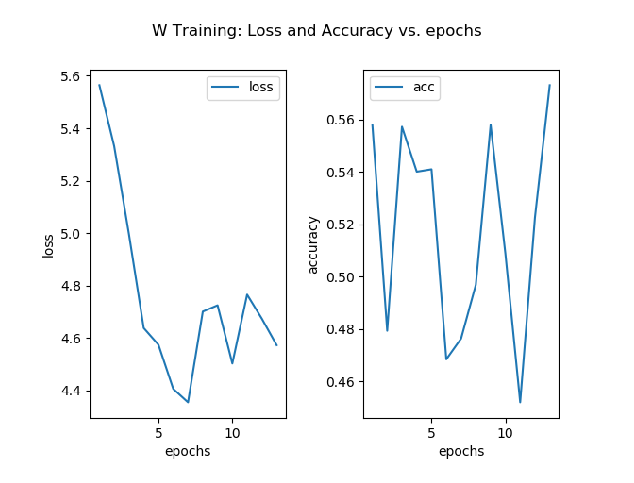

In [9]:
plt.rcParams['figure.dpi'] = 150
ef_train_plot_path = os.path.join( exp_path, 'ef_train_loss_acc.png' )
ef_val_plot_path = os.path.join( exp_path, 'ef_val_loss_acc.png' )

plt.axis('off')
train_img = mpimg.imread(ef_train_plot_path)
plt.imshow(train_img)
plt.show()

plt.axis('off')
val_img = mpimg.imread(ef_val_plot_path)
plt.imshow(val_img)
plt.show()

w_train_plot_path = os.path.join( exp_path, 'w_train_loss_acc.png' )
plt.axis('off')
train_img = mpimg.imread(w_train_plot_path)
plt.imshow(train_img)
plt.show()

### Evaluate Model - Questions ( Deterministic Sampling )

qst_encoder deterministic: True temperature: 0.1
Evaluating question answer pairs


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393680.jpg


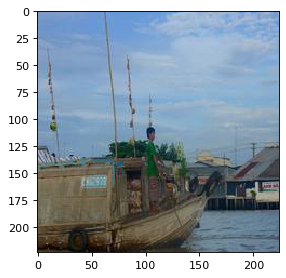

ground truth qst: how many light poles are in front of the boat ? ans: 1
generated qst: what is the man doing ? ans: standing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000132299.jpg


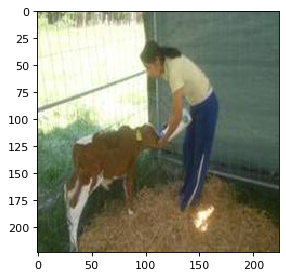

ground truth qst: how many living creatures are present ? ans: 2
generated qst: what is the man holding ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524965.jpg


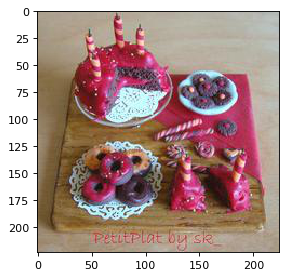

ground truth qst: how many candles are in the photo ? ans: 9
generated qst: what is the man holding ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262541.jpg


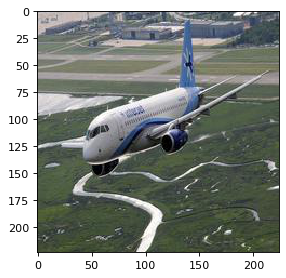

ground truth qst: is the plane flying straight ? ans: no
generated qst: what is the man doing ? ans: tennis


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000001102.jpg


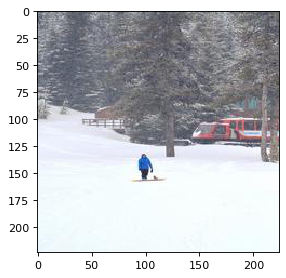

ground truth qst: what color coat in the person wearing ? ans: blue
generated qst: what is the man doing ? ans: skiing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000250.jpg


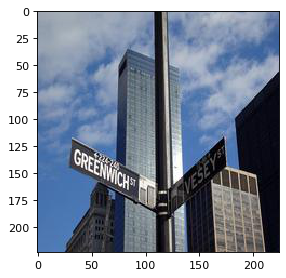

ground truth qst: what is the name of the street that starts with a color ? ans: <unk>
generated qst: what is the man doing ? ans: skiing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000902.jpg


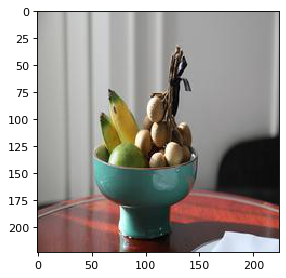

ground truth qst: what color is the base of this item ? ans: blue
generated qst: what is the man doing ? ans: skiing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000502543.jpg


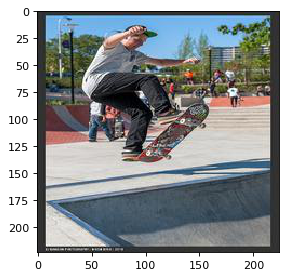

ground truth qst: is he wearing headphones ? ans: no
generated qst: what is the man doing ? ans: skateboarding


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000001111.jpg


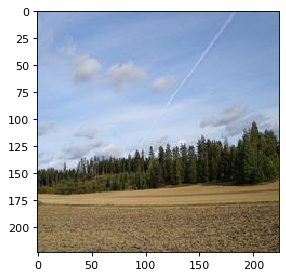

ground truth qst: what kind of trees are in the background ? ans: pine
generated qst: what is the man doing ? ans: flying kite


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131366.jpg


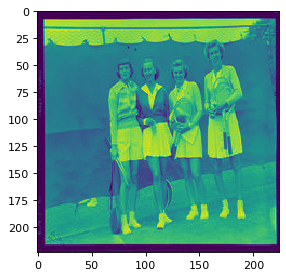

ground truth qst: what three letter word , best describes the liquid container on the ground between the two people ? ans: water
generated qst: what is the man doing ? ans: skateboarding


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000965.jpg


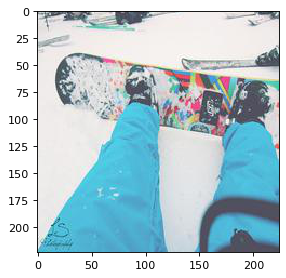

ground truth qst: are there skis in the picture ? ans: yes
generated qst: what is the man doing ? ans: skiing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262747.jpg


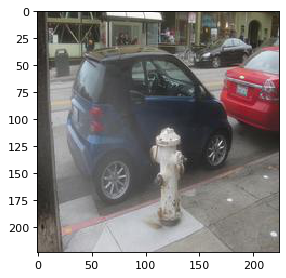

ground truth qst: what color is the hydrant ? ans: white
generated qst: what is the man doing ? ans: skateboarding


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393325.jpg


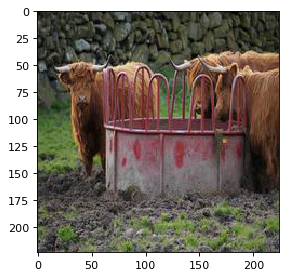

ground truth qst: would you want these animals for pets ? ans: no
generated qst: what is the man doing ? ans: surfing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262662.jpg


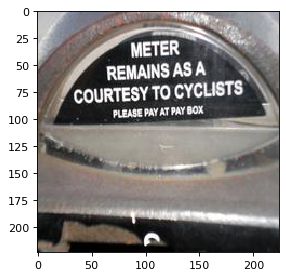

ground truth qst: which word is before the word ' box '? ans: <unk>
generated qst: what is the man doing ? ans: skateboarding


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000541226.jpg


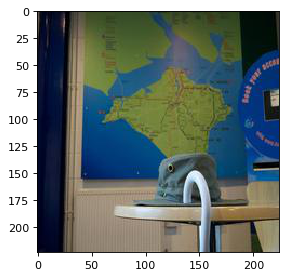

ground truth qst: what is hanging off the table ? ans: umbrella
generated qst: what is the man holding ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000554854.jpg


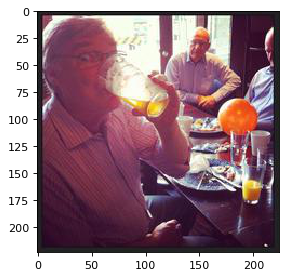

ground truth qst: have the men started eating ? ans: yes
generated qst: what is the man holding ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131511.jpg


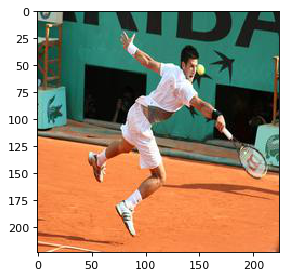

ground truth qst: what is the race of the tennis player ? ans: white
generated qst: what is the man holding ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262508.jpg


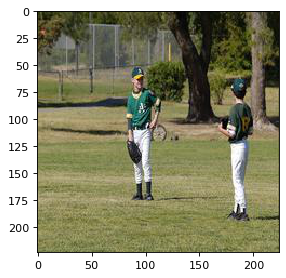

ground truth qst: are they on the same team ? ans: yes
generated qst: what is the man holding ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000008747.jpg


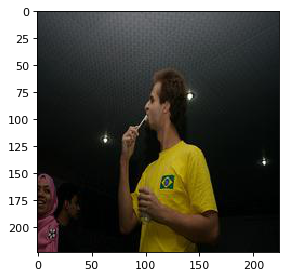

ground truth qst: what flags are pictured ? ans: none
generated qst: what is the man doing ? ans: skateboarding


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000458309.jpg


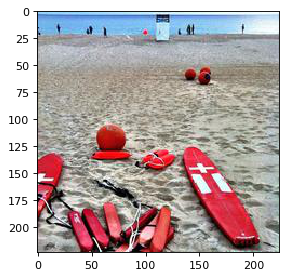

ground truth qst: see footprints in the sand ? ans: yes
generated qst: what is the man doing ? ans: skiing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000322.jpg


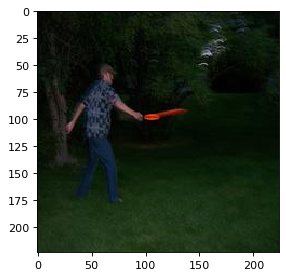

ground truth qst: is the man running ? ans: no
generated qst: what is the man holding ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000506322.jpg


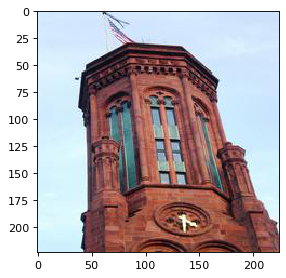

ground truth qst: what time does the clock say ? ans: <unk>
generated qst: what is the man doing ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000000072.jpg


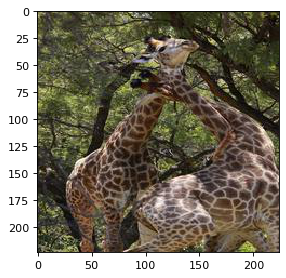

ground truth qst: are the giraffes under the trees ? ans: yes
generated qst: what is the man doing ? ans: skateboarding


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000342184.jpg


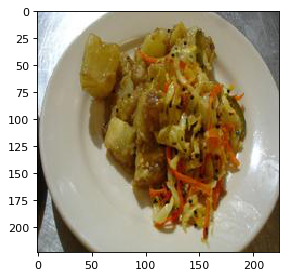

ground truth qst: what vegetable is that ? ans: potatoes
generated qst: what is the man doing ? ans: eating


In [10]:
plt.rcParams['figure.dpi'] = 80
qst_vocab = train_dataset.qst_vocab
ans_vocab = train_dataset.ans_vocab
unk_idx = ans_vocab.unk2idx

qst_encoder = model.qst_encoder
qst_encoder.deterministic = True
qst_encoder.temperature = 0.1
print(f'qst_encoder deterministic: {qst_encoder.deterministic}' + 
      f' temperature: {qst_encoder.temperature}')

def evaluate_qst(model, data_loader, N=24):
    print( 'Evaluating question answer pairs' )
    num_eval = 0
    for batch_idx, batch_sample in enumerate(data_loader):
        if num_eval >= N:
            break
        # print(f'batch_idx: {batch_idx}')
        image = batch_sample['image'].to(DEVICE)
        question = batch_sample['question']
        answer = batch_sample['answer_label']
        image_path = batch_sample['image_path']
        
        # ground truth question and answers
        qst = [ qst_vocab.arr2qst( q ) for q in question ]
        ans = [ ans_vocab.idx2word( a ) for a in answer ]
        
        # generated question-answer
        gen_question, gen_answer = model.generate( image )
        gen_answer[:, unk_idx] = -9999.
        gen_answer = torch.argmax( gen_answer, 1 )
        gen_qst = [ qst_vocab.arr2qst( q ) for q in gen_question ]
        gen_ans = [ ans_vocab.idx2word( a ) for a in gen_answer ]
        
        n = len( image )
        for i in range( n ):
            mod_path = image_path[i].replace( '64', '' )
            print( f'\n\nimage path:{mod_path}' )
            img = mpimg.imread(mod_path)
            imgplot = plt.imshow(img)
            plt.show()
            print( f'ground truth qst: {qst[i]} ans: {ans[i]}' )
            print( f'generated qst: {gen_qst[i]} ans: {gen_ans[i]}' )
        num_eval += n
    
evaluate_qst(model, train_loader)

### Evaluate Model - Questions ( Stochastic Sampling )

qst_encoder deterministic: False temperature: 0.6
Evaluating question answer pairs


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262399.jpg


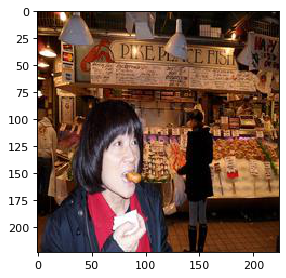

ground truth qst: what is the name of the store behind the lady ? ans: <unk>
generated qst: what is the name of the an bags ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000474858.jpg


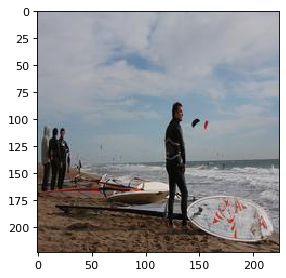

ground truth qst: what color is the man ' s skin ? ans: white
generated qst: what is on the back of the truck ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131277.jpg


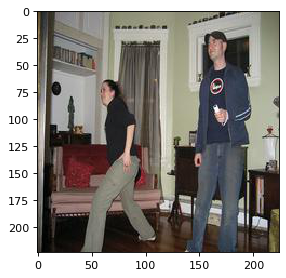

ground truth qst: is there a man and a woman ? ans: yes
generated qst: what color is the cat ? ans: black


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393230.jpg


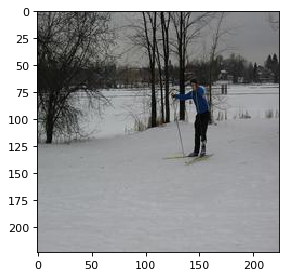

ground truth qst: is the person wearing a hat ? ans: yes
generated qst: what is the man holding ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393325.jpg


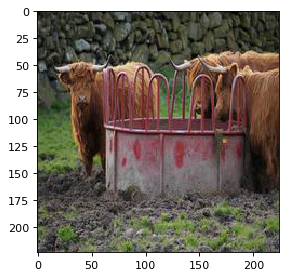

ground truth qst: do you see a flower ? ans: no
generated qst: what is the name of the player ? ans: giraffe


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000394211.jpg


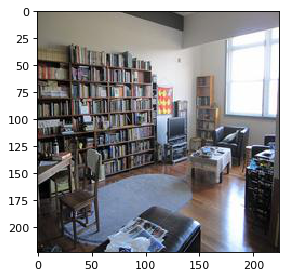

ground truth qst: is there a television in the corner ? ans: yes
generated qst: what is the child holding ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524679.jpg


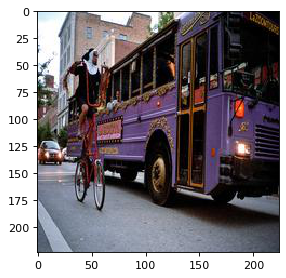

ground truth qst: what is the nun doing in this scene ? ans: <unk>
generated qst: is the man on the bike wearing a helmet ? ans: yes


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131427.jpg


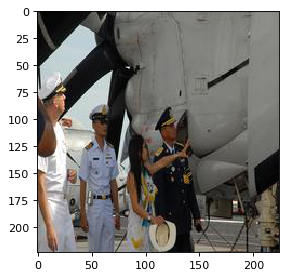

ground truth qst: how many females are in the picture ? ans: 1
generated qst: what is the color of the cat ? ans: white


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000419019.jpg


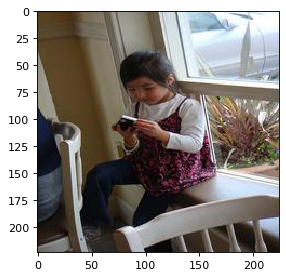

ground truth qst: what color is the chair ? ans: white
generated qst: are the people in fancy or dish ? ans: yes


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000137045.jpg


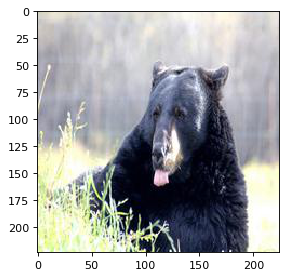

ground truth qst: what is this ? ans: bear
generated qst: how many people are seated ? ans: 2


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000525529.jpg


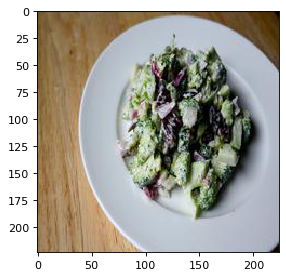

ground truth qst: what is the plate sitting on ? ans: table
generated qst: is the dog on a bed ? ans: yes


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000525518.jpg


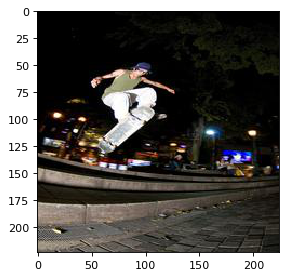

ground truth qst: what ' s the kid doing ? ans: skating
generated qst: what is the man doing ? ans: skateboarding


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000043893.jpg


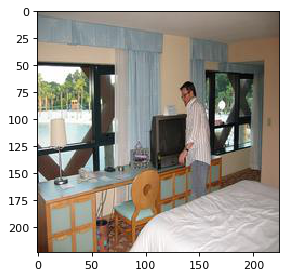

ground truth qst: what object is this man directly in front of ? ans: tv
generated qst: are the children in the water ? ans: 2


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131909.jpg


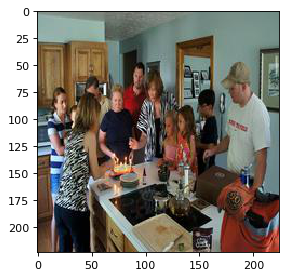

ground truth qst: what is the person behind the counter serving ? ans: cake
generated qst: what is the name of the batter in uniform ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000506322.jpg


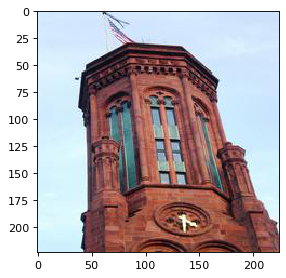

ground truth qst: is this a church ? ans: no
generated qst: what color is the sign ? ans: red


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000270612.jpg


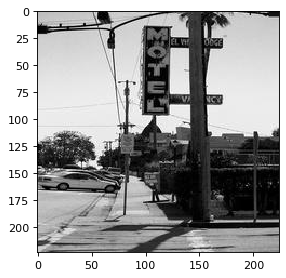

ground truth qst: are the cars parked on the street ? ans: yes
generated qst: what color is the building in the background ? ans: white


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262747.jpg


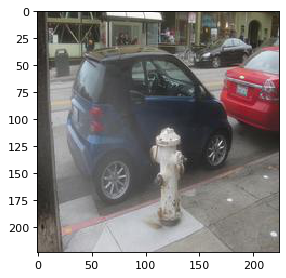

ground truth qst: the blue car is what make and model ? ans: unknown
generated qst: what is the girl on the right carrying ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000506315.jpg


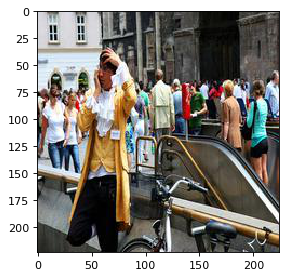

ground truth qst: is the a bike in a picture ? ans: yes
generated qst: how many people are wearing hats ? ans: 2


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131427.jpg


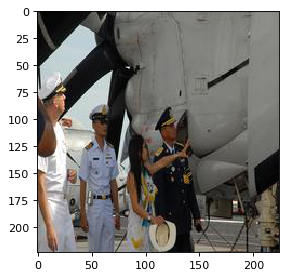

ground truth qst: are these people friends ? ans: yes
generated qst: what is the color of the umbrella ? ans: white


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000393317.jpg


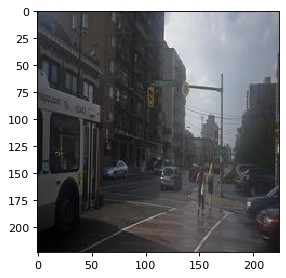

ground truth qst: what color is the traffic signal ? ans: green
generated qst: what is the person holding ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000524338.jpg


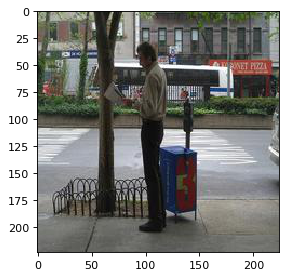

ground truth qst: what type of tree is the man standing next to ? ans: maple
generated qst: what is the man doing ? ans: walking


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000262932.jpg


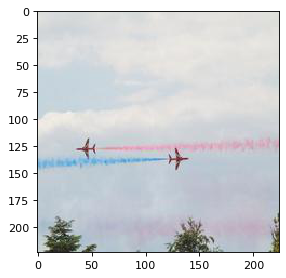

ground truth qst: what is in the air ? ans: planes
generated qst: what is the man doing ? ans: skiing


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000270636.jpg


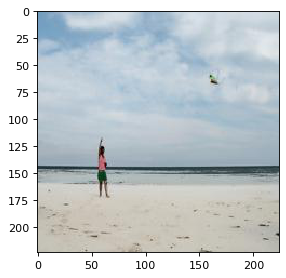

ground truth qst: who is flying the kite ? ans: woman
generated qst: what is on the ground ? ans: none


image path:/home/aahamed/workspace/data/vqa/Resized_Images/train2014/COCO_train2014_000000131465.jpg


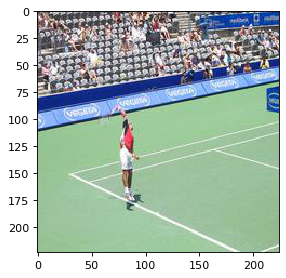

ground truth qst: what color is the court ? ans: green
generated qst: is the man wearing glasses ? ans: yes


In [12]:
qst_encoder = model.qst_encoder
qst_encoder.deterministic = False
qst_encoder.temperature = 0.6
print(f'qst_encoder deterministic: {qst_encoder.deterministic}' + 
      f' temperature: {qst_encoder.temperature}')
evaluate_qst(model, train_loader, N=24)